In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# image = cv2.imread(r'./apple_example.jpeg')
# image = cv2.imread(r'./trafic_light_example.jpg')
# image = cv2.imread(r'./bus-red-line-img.jpg')
# image = cv2.imread(r'./dva.png')
image = cv2.imread(r'./thriangle_light.jpeg')
# image = plt.imread(r'./apple_example.jpeg')

In [121]:
def merge_mask(mask1, mask2):
    return (mask1 + mask2) / 2

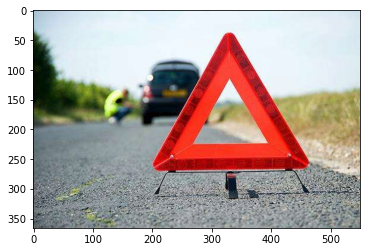

In [122]:
imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower1 = np.array((0, 70, 50))
higher1 = np.array([10, 255, 255])
lower2 = np.array((170, 70, 50))
higher2 = np.array([180, 255, 255])

# detect red
mask1 = cv2.inRange(imgHSV, lower1, higher1)
mask2 = cv2.inRange(imgHSV, lower2, higher2)
mask = mask1|mask2

# detect edge
x = cv2.Sobel(mask, cv2.CV_16S, 1, 0)
y = cv2.Sobel(mask, cv2.CV_16S, 0, 1)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# sobel = 255-sobel
sobel = cv2.cvtColor(sobel, cv2.COLOR_GRAY2RGB)

result = cv2.addWeighted(image, 0.3, sobel, 1, 0)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.imshow(cv2.cvtColor(imgHSV, cv2.COLOR_HSV2RGB))
# plt.imshow(mask1)print(max(imgHSV))

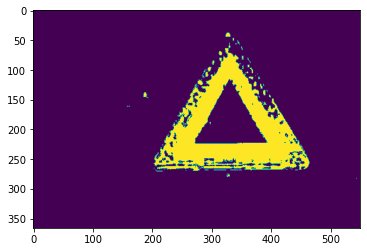

In [123]:
plt.imshow(mask1)

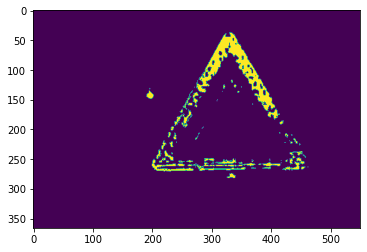

In [124]:
plt.imshow(mask2)

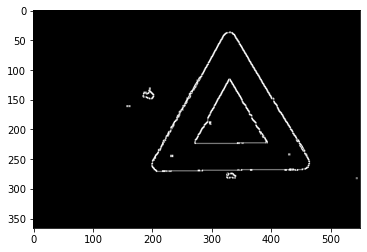

In [125]:
plt.imshow(sobel)

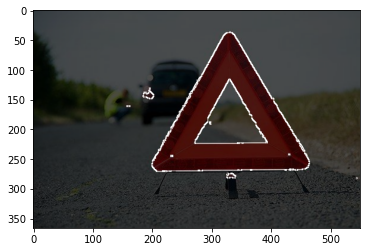

In [126]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))